In [1]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2
from PIL import Image
from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow
import matplotlib.pylab as pylab
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d
from scipy.fft import fft2, ifft2, fftshift, ifftshift

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

## Display image

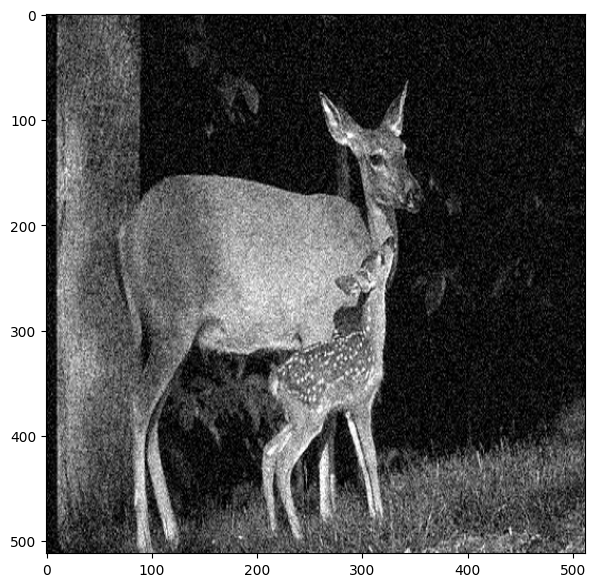

In [2]:
im = Image.open("Figures/noisy_image0_noise_lvl25.jpg")
im = im.resize((512, 512))
# im = misc.imread("barbara.png").astype(float)

f = plt.figure()
plt.imshow(im,cmap='gray')

In [3]:
import pywt

def wavelet_dct2(a):
    return pywt.dwt2(a, 'haar')

def wavelet_idct2(coeffs):
    return pywt.idwt2(coeffs, 'haar')

In [54]:
def denoise_image(original_image, level=1, wavelet='haar', threshold_type='hard', threshold_value=20):
    
    coeffs = pywt.wavedec2(original_image, wavelet, level=level)
    
    coeffs = [tuple(pywt.threshold(c, threshold_value, mode=threshold_type)) for c in coeffs]

    # Reconstruct the denoised image
    denoised_image = pywt.waverec2(coeffs, 'haar')

    # denoised_image = np.uint8(np.clip(denoised_image, 0, 255))  # Clip values to [0, 255]
    
    return denoised_image


output_image = denoise_image(im, level=2)

Text(0.5, 1.0, 'Denoised image')

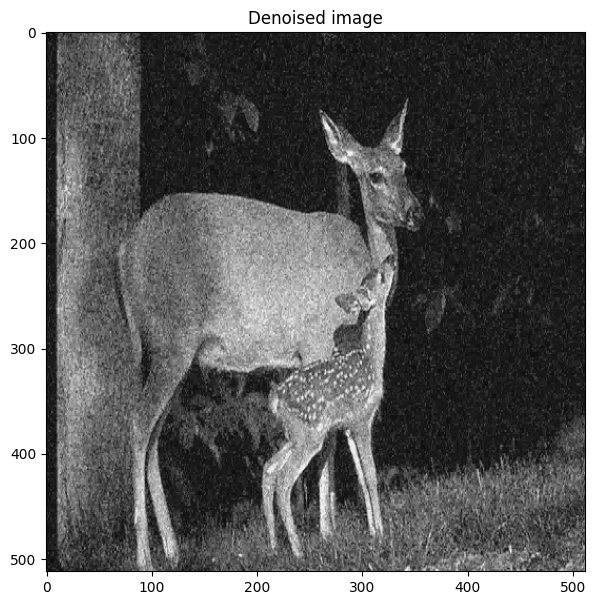

In [55]:
plt.figure()
plt.imshow(output_image,cmap='gray')
plt.title("Denoised image" )

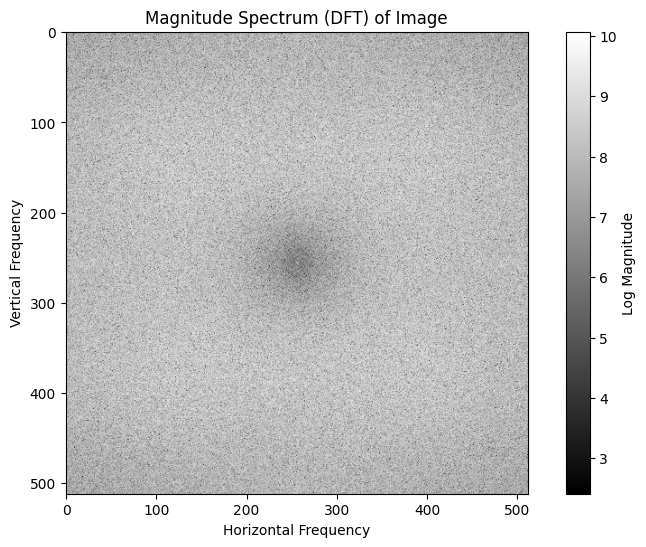

Text(0.5, 1.0, 'Difference between original and DWT denoised image')

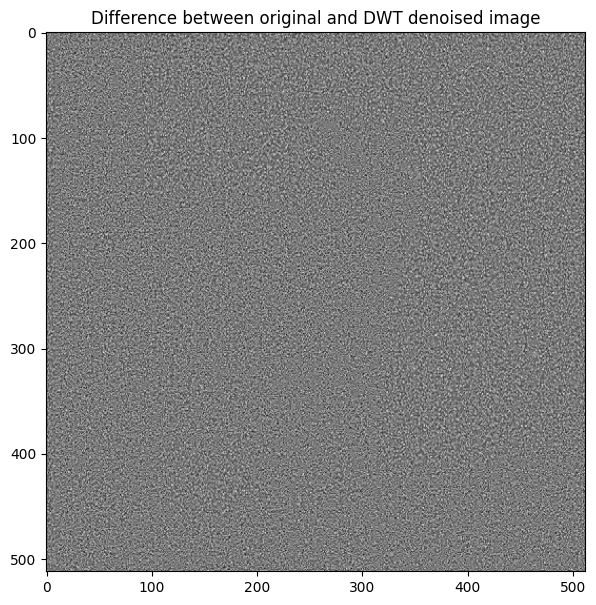

In [56]:
dft_image = fftshift(fft2(im-output_image))

# Compute the magnitude spectrum
magnitude_spectrum = np.abs(dft_image)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 6))
plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray')
plt.colorbar(label='Log Magnitude')
plt.title('Magnitude Spectrum (DFT) of Image')
plt.xlabel('Horizontal Frequency')
plt.ylabel('Vertical Frequency')
plt.show()

plt.figure()
plt.imshow((im-output_image) ,cmap='gray')
plt.title("Difference between original and DWT denoised image" )

In [60]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr


def compute_metrics(original_image, denoised_image):
    # Ensure both images have the same dimensions
    original_image = cv2.resize(original_image, (denoised_image.shape[1], denoised_image.shape[0]))

    # Compute SSIM
    ssim_value = ssim(original_image, denoised_image)

    # Compute PSNR
    psnr_value = psnr(original_image, denoised_image)

    print("SSIM:", ssim_value)
    print("PSNR:", psnr_value)

In [62]:
noisy_image = cv2.imread("Figures/noisy_image0_noise_lvl25.jpg", cv2.IMREAD_GRAYSCALE)
clean_image = cv2.imread("Figures/image2.jpg", cv2.IMREAD_GRAYSCALE)
 
compute_metrics(clean_image, noisy_image)
compute_metrics(clean_image, output_image)

SSIM: 0.393367267233231
PSNR: 21.327769341806288
SSIM: 0.4739024714572125
PSNR: 23.711026704750573


/home/mihai/anaconda3/lib/python3.9/site-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
/tmp/ipykernel_2185723/2411540871.py:13: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_value = psnr(original_image, denoised_image)
